In [216]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
import matplotlib.pyplot as plt

In [83]:
df = pd.read_csv("./KOI2.csv", sep=";")
df["Harga"] = df.loc[:, "Harga"].apply(lambda h: int(h.replace(".", "")))
df.head()

,Jenis Ikan,Ukuran,Gender,Umur,Jumlah Corak,Corak Dominan,Spesifikasi,Harga,Tempat
0,Goromo,11,Female,Dibawah 1 tahun,2,Putih dan Hitam/Merah,Local,8000,Kelir
1,Goromo,11,Female,Dibawah 1 tahun,2,Putih dan Hitam/Merah,Import,16000,Bulusan
2,Goromo,12,Female,Dibawah 1 tahun,2,Putih dan Hitam/Merah,Local,10000,Kelir
3,Goromo,12,Female,Dibawah 1 tahun,2,Putih dan Hitam/Merah,Import,17000,Bulusan
4,Goromo,13,Female,Dibawah 1 tahun,2,Putih dan Hitam/Merah,Local,12000,Kelir


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Jenis Ikan     800 non-null    object
 1   Ukuran         800 non-null    int64 
 2   Gender         800 non-null    object
 3   Umur           800 non-null    object
 4   Jumlah Corak   800 non-null    int64 
 5   Corak Dominan  800 non-null    object
 6   Spesifikasi    800 non-null    object
 7   Harga          800 non-null    int64 
 8   Tempat         800 non-null    object
dtypes: int64(3), object(6)
memory usage: 56.4+ KB


In [86]:
df.isnull().sum()

Jenis Ikan       0
Ukuran           0
Gender           0
Umur             0
Jumlah Corak     0
Corak Dominan    0
Spesifikasi      0
Harga            0
Tempat           0
dtype: int64

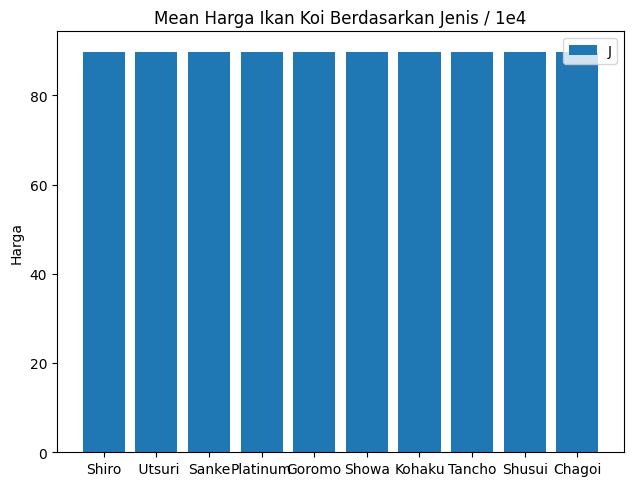

In [75]:
def plot_by_fish_type():
    trimmed_df = df[["Jenis Ikan", "Harga"]]
    fig, ax = plt.subplots()
    fig.tight_layout()

    fishes = list(set(trimmed_df["Jenis Ikan"]))
    fish_price_mean = []
    for fish in fishes:
        current_df = trimmed_df[trimmed_df["Jenis Ikan"] == fish]
        fish_price_mean.append(current_df["Harga"].mean() / 1e4)

    ax.bar(fishes, fish_price_mean)

    ax.set_ylabel('Harga')
    ax.set_title('Mean Harga Ikan Koi Berdasarkan Jenis / 1e4')
    ax.legend('Jenis Ikan')


plot_by_fish_type()


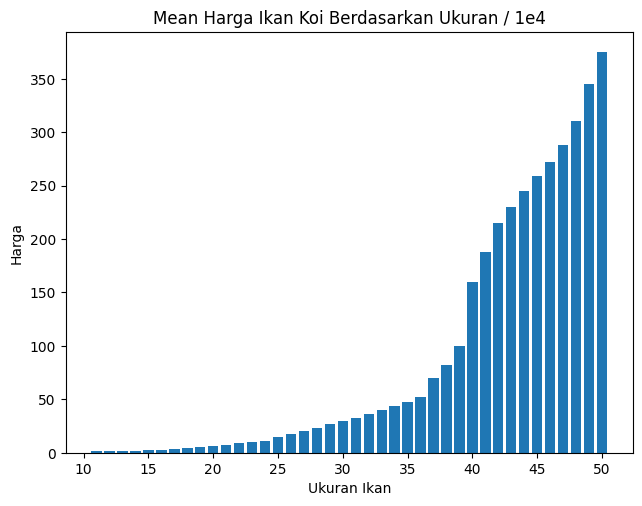

In [79]:
def plot_by_size():
    trimmed_df = df[["Ukuran", "Harga"]]
    fig, ax = plt.subplots()
    fig.tight_layout()

    fishes = list(set(trimmed_df["Ukuran"]))
    fish_price_mean = []
    for fish in fishes:
        current_df = trimmed_df[trimmed_df["Ukuran"] == fish]
        fish_price_mean.append(current_df["Harga"].mean() / 1e4)

    ax.bar(fishes, fish_price_mean)

    ax.set_ylabel('Harga')
    ax.set_title('Mean Harga Ikan Koi Berdasarkan Ukuran / 1e4')
    ax.set_xlabel('Ukuran Ikan')


plot_by_size()


In [184]:
features = df.loc[:, ["Ukuran"]]
labels = df['Harga']
features.shape, labels.shape

((800, 1), (800,))

In [188]:
features["Ukuran"] = features['Ukuran'].apply(lambda f: (f - features["Ukuran"].min())/ (features["Ukuran"].max() - features["Ukuran"].min()))
features

,Ukuran
0,0.000000
1,0.000000
2,0.025641
3,0.025641
4,0.051282
...,...
795,0.948718
796,0.974359
797,0.974359
798,1.000000


In [189]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [209]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [210]:
print(model.coef_)

[[-2.56090743]
 [-2.62095639]
 [-2.08805092]
 [-1.96609405]
 [-3.15983799]
 [-2.21075341]
 [-2.64308693]
 [-1.54484417]
 [-2.97179218]
 [-2.18002379]
 [-1.62414493]
 [-2.61316766]
 [-1.24798434]
 [-2.29926646]
 [-2.06512628]
 [-1.05536596]
 [-1.73038777]
 [-1.64599189]
 [-1.31395619]
 [-0.38599198]
 [-1.05160547]
 [-0.24044544]
 [-0.80018878]
 [-0.67875646]
 [ 0.17254595]
 [-0.3121055 ]
 [ 0.37455563]
 [-0.16701797]
 [ 0.1162411 ]
 [-0.31601229]
 [ 0.35179167]
 [ 0.53856244]
 [ 0.63690073]
 [ 0.17254595]
 [ 0.28057273]
 [ 0.43464734]
 [ 1.27834056]
 [ 1.54196112]
 [ 1.41876699]
 [ 1.669329  ]
 [ 1.53001414]
 [ 1.80423118]
 [ 2.23790094]
 [ 2.21899986]
 [ 2.43845192]
 [ 2.11574358]
 [ 2.42215335]
 [ 1.25320829]
 [ 1.39131042]
 [ 1.29753708]
 [ 1.41365984]
 [ 1.67530858]
 [ 2.08498037]
 [ 2.09134304]
 [ 2.23343675]
 [ 1.3099746 ]
 [ 2.32465479]
 [ 2.66419272]]


In [214]:
y_pred = pd.Series(model.predict(x_test))
y_test = y_test.reset_index(drop=True)
z = pd.concat([y_test, y_pred], axis=1)
z.columns = ['Real', 'Prediction']
z.head()

,Real,Prediction
0,500000,750000
1,150000,90000
2,3500000,1200000
3,1000000,750000
4,900000,1200000


In [235]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='weighted', zero_division=np.nan))
print("Recall: ", recall_score(y_test, y_pred, average='weighted', zero_division=np.nan))

Accuracy:  0.04375
Precision:  0.07772003538257409
Recall:  0.04375
